In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def get_thresholds():
    thresholds_str = input("Enter the thresholds: ")
    threshold_list = thresholds_str.split()
    thresholds=[]
    for threshold in threshold_list:
        thresholds.append(int(threshold))
    thresholds.insert(0,0)
    thresholds.append(256)    
    num_threshold = len(thresholds)
    return thresholds,num_threshold


In [3]:
def histCount():
    path = input("Enter the path of the image(EX: C:\\....): ")
    img_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    histogram,bins = np.histogram(img_array,bins=256,range=(0,255))
    return histogram,bins

In [4]:
def plot_histogram(histogram,bin_edges):
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("grayscale value")
    plt.ylabel("pixels")
    plt.xlim([0,255])
    plt.plot(bin_edges[0:-1],histogram)
    plt.show()



In [56]:
def masi_entropy(thresholds,histogram):
    r= -1
    prob=[]
    sum_ = np.sum(histogram)
    #print(sum_)
    
    for value in histogram:
        prob.append(value/sum_)
        
    thresholds.sort()
    #print(thresholds)
    classes = len(thresholds) -1
    #print(classes)
    #count = 0
    w = {}
    output = {}
    for i in range(classes):
        if thresholds[i+1] ==256:
            w_values = w.values()
            s=0
            for value in w_values:
                s+=value
            w_gen = 1 - s 
        else:
            w_gen = np.sum(prob[thresholds[i]:thresholds[i+1]])
        w["w"+str(i)] = w_gen
        
        out = 0
        print(w)
        if w["w"+str(i)]> 0:
            for j in range(thresholds[i],thresholds[i+1]):
                if prob[j]> 0:
                    out= out+(prob[j]/w["w"+str(i)]) * np.log(prob[j]/w["w"+str(i)])
            output["out"+str(i)] = out
        #print(output)
        #count+=1

    
    src = {}
    for i in range(0,classes):
        src["class"+str(i)] = (1/(1-r)) * (np.log(1-(1-r)*(output["out"+str(i)])))
    print(src)
    src_classes = src.values()
    src_total = 0
    for src_values in src_classes:
        src_total+= src_values
    return src_total


In [61]:
def main():
    histogram,bins = histCount()
    plot_histogram(histogram,bins)
    thresholds,num_threshold= get_thresholds()
    sigma = masi_entropy(thresholds,histogram)
    print("\n",sigma)

Enter the path of the image(EX: C:\....): C:\\Users\\Dark Viper\\Desktop\\polar.jpeg


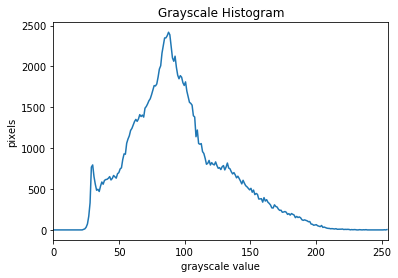

Enter the thresholds: 52 152
{'w0': 0.09702009702009702}
{'w0': 0.09702009702009702, 'w1': 0.8226306824437665}
{'w0': 0.09702009702009702, 'w1': 0.8226306824437665, 'w2': 0.08034922053613647}
{'class0': 1.0036281639772884, 'class1': 1.1524909978695859, 'class2': 1.0913240900079373}

 3.2474432518548113


In [62]:
main()